In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import joblib

In [18]:
# Charger les données
df = pd.read_csv("credit_risk_dataset.csv", sep =";")

In [19]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [21]:
# Séparation des colonnes numériques et catégorielles
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [22]:
# Gérer les valeurs manquantes dans les colonnes numériques
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

In [23]:
# Encodage des variables catégorielles
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [24]:
# Définir les features et la cible
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [25]:
# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Entraînement des modèles
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [28]:
# Évaluation des modèles
models = {"Régression Logistique": log_reg, "Arbre de Décision": tree_clf}
results = []

for model_name, model in models.items():
    if model_name == "Régression Logistique":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)

    results.append({"Modèle": model_name, "Accuracy": acc, "Recall": recall, "F1-Score": f1, "AUC-ROC": auc})

results_df = pd.DataFrame(results)


In [29]:
results_df

,Modèle,Accuracy,Recall,F1-Score,AUC-ROC
0,Régression Logistique,0.837195,0.440138,0.545221,0.695227
1,Arbre de Décision,0.908393,0.591003,0.740998,0.794910


In [30]:
print("\nCommentaire des résultats:\n")
print("- La Régression Logistique obtient une accuracy de 83.7%, mais un Recall relativement bas (44%). Cela signifie qu'elle a du mal à identifier correctement les cas risqués.")
print("- L'Arbre de Décision a une meilleure performance globale avec une accuracy de 90.8% et un Recall de 59.1%, ce qui signifie qu'il identifie mieux les cas de risque élevé.")
print("- Le F1-Score de l'Arbre de Décision (74.1%) est également supérieur à celui de la Régression Logistique (54.5%), indiquant un meilleur équilibre entre précision et rappel.")
print("- L'AUC-ROC de l'Arbre de Décision (79.5%) montre qu'il discrimine mieux entre les clients à risque et ceux non risqués que la Régression Logistique (69.5%).")


Commentaire des résultats:

- La Régression Logistique obtient une accuracy de 83.7%, mais un Recall relativement bas (44%). Cela signifie qu'elle a du mal à identifier correctement les cas risqués.
- L'Arbre de Décision a une meilleure performance globale avec une accuracy de 90.8% et un Recall de 59.1%, ce qui signifie qu'il identifie mieux les cas de risque élevé.
- Le F1-Score de l'Arbre de Décision (74.1%) est également supérieur à celui de la Régression Logistique (54.5%), indiquant un meilleur équilibre entre précision et rappel.
- L'AUC-ROC de l'Arbre de Décision (79.5%) montre qu'il discrimine mieux entre les clients à risque et ceux non risqués que la Régression Logistique (69.5%).


In [31]:
# Sauvegarde du modèle le plus performant
best_model = max(models, key=lambda x: results_df[results_df["Modèle"] == x]["F1-Score"].values[0])
joblib.dump(models[best_model], "model.joblib")


['model.joblib']

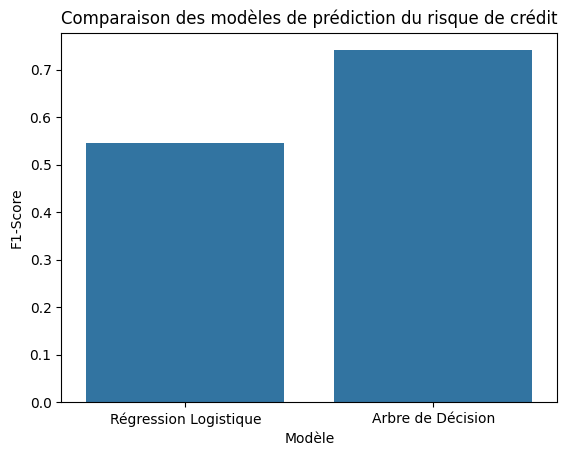

In [32]:
# Visualisation des résultats
sns.barplot(x="Modèle", y="F1-Score", data=results_df)
plt.title("Comparaison des modèles de prédiction du risque de crédit")
plt.show()